# Time Series Prediction with Prophet 

In [ ]:
# Facebook Research Prophet solves the following problems:
# - Seasonal effects caused by human behavior: weekly, monthly and yearly cycles, dips and peaks on public holidays.
# - Changes in trend due to new products and market events.
# - Outliers.

In [203]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# time series algorithm
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [204]:
!pip list

Package                            Version             Location      
---------------------------------- ------------------- --------------
absl-py                            0.6.1               
alabaster                          0.7.10              
algopy                             0.5.7               
altair                             2.3.0               
anaconda-client                    1.6.14              
anaconda-navigator                 1.8.7               
anaconda-project                   0.8.2               
annoy                              1.15.0              
appdirs                            1.4.3               
arrow                              0.12.1              
asn1crypto                         0.24.0              
astor                              0.7.1               
astroid                            1.6.3               
astropy                            3.0.2               
attrs                              18.1.0              
audioread           

In [205]:
#Test from here: https://pypi.org/project/fbprophet/

from fbprophet import Prophet
m = Prophet()
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=30) #30 days

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [206]:
df
#Monthly data

,ds,y
0,1981-01-31,266.0
1,1981-02-28,145.9
2,1981-03-31,183.1
3,1981-04-30,119.3
4,1981-05-31,180.3
5,1981-06-30,168.5
6,1981-07-31,231.8
7,1981-08-31,224.5
8,1981-09-30,192.8
9,1981-10-31,122.9


In [207]:
forecast = m.predict(future)
#It give 30 days after 1983-12-31
forecast.tail(n=31)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35,1983-12-31,517.456960,446.303914,622.634622,517.456960,517.456960,17.222437,17.222437,17.222437,17.222437,17.222437,17.222437,0.0,0.0,0.0,534.679397
36,1984-01-01,517.846141,445.976880,617.506192,517.846141,517.846141,9.129112,9.129112,9.129112,9.129112,9.129112,9.129112,0.0,0.0,0.0,526.975253
37,1984-01-02,518.235323,425.620852,602.463161,518.235323,518.235323,0.920980,0.920980,0.920980,0.920980,0.920980,0.920980,0.0,0.0,0.0,519.156302
38,1984-01-03,518.624504,421.437919,599.634530,518.624504,518.624504,-7.292763,-7.292763,-7.292763,-7.292763,-7.292763,-7.292763,0.0,0.0,0.0,511.331741
39,1984-01-04,519.013685,412.388154,601.550849,519.013685,519.013685,-15.399392,-15.399392,-15.399392,-15.399392,-15.399392,-15.399392,0.0,0.0,0.0,503.614294
40,1984-01-05,519.402867,405.698084,592.725305,519.402867,519.402867,-23.284680,-23.284680,-23.284680,-23.284680,-23.284680,-23.284680,0.0,0.0,0.0,496.118186
41,1984-01-06,519.792048,397.376493,571.948399,519.792048,519.792048,-30.835024,-30.835024,-30.835024,-30.835024,-30.835024,-30.835024,0.0,0.0,0.0,488.957023
42,1984-01-07,520.181229,398.529431,569.245610,520.181229,520.181229,-37.939617,-37.939617,-37.939617,-37.939617,-37.939617,-37.939617,0.0,0.0,0.0,482.241612
43,1984-01-08,520.570410,385.274807,566.456378,520.570410,520.570410,-44.492632,-44.492632,-44.492632,-44.492632,-44.492632,-44.492632,0.0,0.0,0.0,476.077779
44,1984-01-09,520.959592,382.657881,564.569359,520.959592,520.959592,-50.395352,-50.395352,-50.395352,-50.395352,-50.395352,-50.395352,0.0,0.0,0.0,470.564240


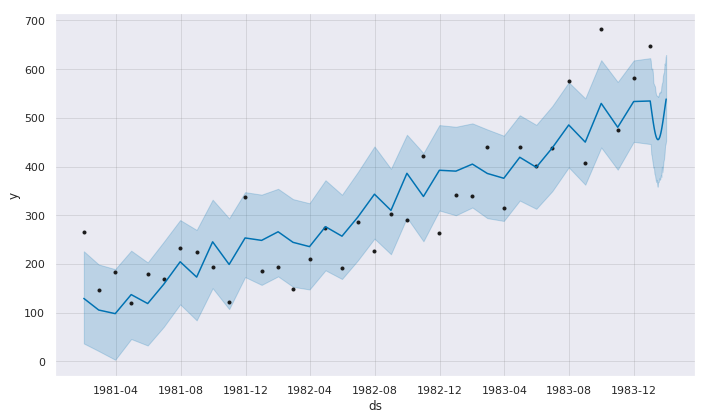

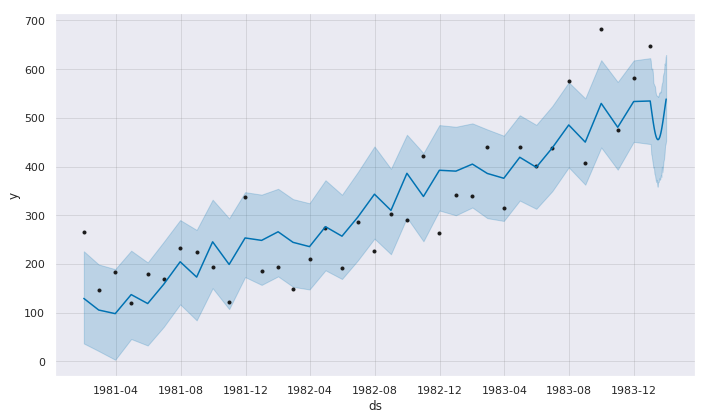

In [208]:
m.plot(forecast)

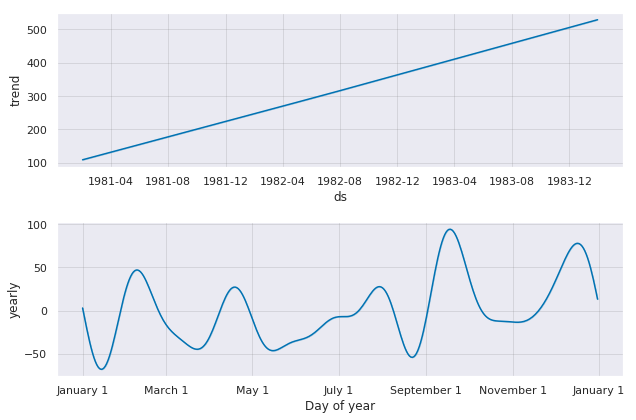

In [209]:
m.plot_components(forecast);
#No seasonality

In [210]:
#Test from Dailyclimate. I had a video with linear regression and Fourier methods.
# Load the time series as a Pandas dataframe
data = pd.read_csv(
    '../input/delhiclimate/DailyDelhiClimateTrain.csv',
)
data.tail()

,date,meantemp,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [211]:
data = data[['date','meantemp']]
data = data.rename(columns={"date": "ds", "meantemp": "y"})
data.tail()

,ds,y
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632
1461,2017-01-01,10.000000


In [231]:
mm = Prophet()
mm.fit(data)  # df is a pandas.DataFrame with 'y' and 'ds' columns
futuremm = mm.make_future_dataframe(periods=1460) #four yers

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [232]:
forecastmm = mm.predict(futuremm)

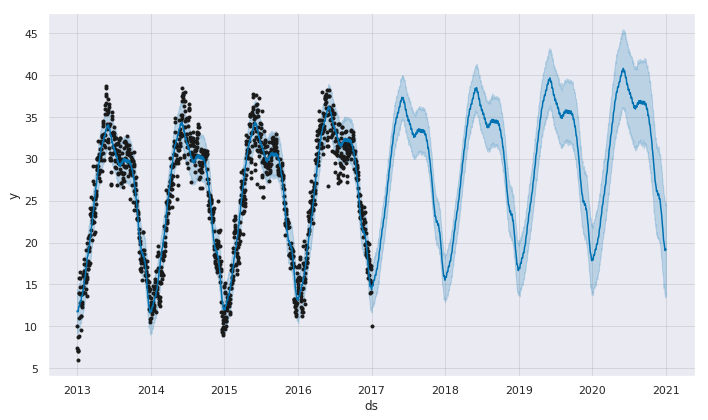

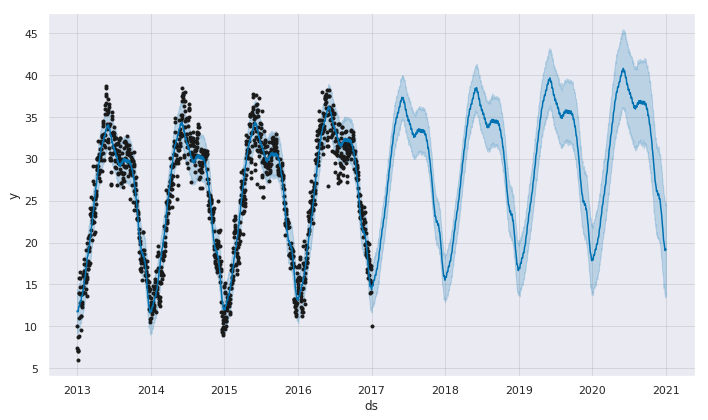

In [233]:
mm.plot(forecastmm)

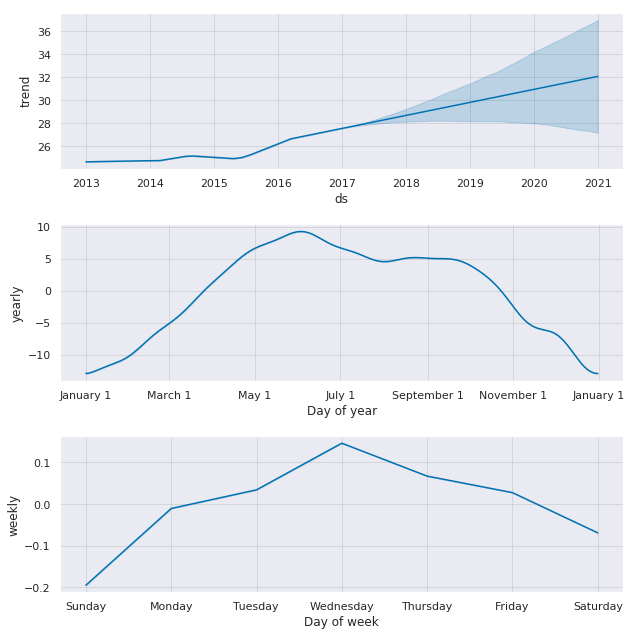

In [234]:
mm.plot_components(forecastmm);